In [1]:
# extra analysis for supplmental figure and fig 4 and 5

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Using cached statsmodels-0.14.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


In [24]:
from sklearn.model_selection import ShuffleSplit, LeaveOneOut
from brainspace.gradient import GradientMaps

### Setting path

In [25]:
# Set this to your git-repo path for running the analyses.
# main_path = "/srv/khan/users/sudesnac/00_Projects/HumanBF-Connectivity"
main_path = "/home/sudesnac/20_submitted/HumanBF-Connectivity"

In [26]:
# Setting other paths
data_path = main_path + "/data/"
results_path = main_path + "/results/extra_analysis/"
fig_path = main_path + "/results/extra_analysis/figures/"

In [27]:
Func_results = main_path + "/results/Func_gradients/"
Diff_results = main_path + "/results/Diff_gradients/"
Gradc_results = main_path + "/results/gradient_correlation/"
Conn_results = main_path + "/results/connectivity_distance/"

### Supplemental Figure 4

In [28]:
# Load residuals
resid_results = pd.read_csv(Gradc_results + 'Struct_vs_Func_linear_least-squares_regression_s6-f4_residuals_statsmodels.csv')

In [29]:
# Squared 
resid_squared = resid_results**2

In [30]:
# Extract unweighted average and sg1-fg1 residuals
unweighted_avg_resid_squared = np.nanmean(resid_squared.values, axis=1)
sg1_fg1_resid_squared        = resid_squared[resid_squared.columns[0]].values

In [51]:
print(unweighted_avg_resid_squared)

[0.00385548 0.003507   0.00392511 0.0032625  0.00393563 0.00394385
 0.00376442 0.01803119 0.01676299 0.00423956 0.00431666 0.00449278
 0.00728977 0.01953632 0.01852491 0.01712243 0.01963688 0.01703786
 0.01641249 0.01701806 0.01639543 0.01167502 0.01287684 0.00354651
 0.00421057 0.0041635  0.00396276 0.00344937 0.00443244 0.02071288
 0.02008161 0.01418009 0.01759048 0.0190855  0.01790749 0.01846924
 0.01758586 0.0156288  0.01595036 0.01538023 0.00392191 0.0039866
 0.00400607 0.00412891 0.0038264  0.0042918  0.00940813 0.00805064
 0.0198717  0.01614029 0.01880915 0.01908879 0.01801239 0.01438644
 0.01958009 0.01528143 0.01422874 0.01360705 0.01659029 0.0148707
 0.00412807 0.00368896 0.00418988 0.00388349 0.00382122 0.00306766
 0.00296323 0.00312947 0.00291933 0.00709539 0.00544817 0.00910573
 0.01178537 0.00776731 0.01826872 0.01744105 0.01392968 0.01434091
 0.01764731 0.01463485 0.01356211 0.01385651 0.01704533 0.01306888
 0.00433878 0.0049824  0.00488341 0.00431906 0.00434221 0.002025

In [41]:
# Pearson's correlation
corr = linregress(sg1_fg1_resid_squared, unweighted_avg_resid_squared)
print(corr)

LinregressResult(slope=np.float64(0.19935996892679755), intercept=np.float64(0.0031768639201613033), rvalue=np.float64(0.9181041647011812), pvalue=np.float64(3.9513418530112015e-242), stderr=np.float64(0.00352229589691234), intercept_stderr=np.float64(9.842016869870275e-05))


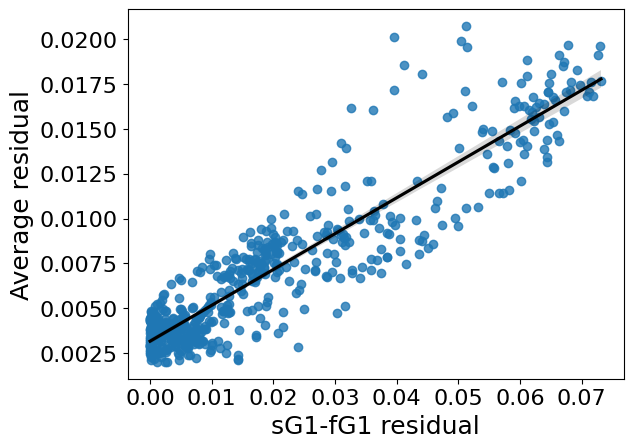

In [12]:
# Plot correlation
sc = sns.regplot(
    x=sg1_fg1_resid_squared,
    y=unweighted_avg_resid_squared,
    line_kws={'color': 'black'},
)
#sc.axes.set_ylim(0,0.01,0.04)
#sc.axes.set_xlim(0, 0.08)

sc.set_xlabel('sG1-fG1 residual',fontsize=18)
sc.set_ylabel('Average residual',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(fig_path + f'Unweighted-average_vs_sg1-fg1_residuals-corr.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

#### sG1-fG1 vs average (except sG1-fG1)

In [32]:
resid_squared_except_sg1fg1 = resid_squared.drop('(0, 0)', axis=1)

In [33]:
#resid_squared_except_sg1fg1 

In [34]:
# Extract unweighted average and sg1-fg1 residuals
avg_exceptg1s_resid_squared = np.nanmean(resid_squared_except_sg1fg1.values, axis=1)
sg1_fg1_resid_squared        = resid_squared[resid_squared.columns[0]].values

In [42]:
avg_exceptg1s_resid_squared

array([0.00387859, 0.00358081, 0.0040828 , 0.00325926, 0.00401828,
       0.00395412, 0.00379055, 0.01598569, 0.01464989, 0.00440693,
       0.00450194, 0.00468549, 0.00723998, 0.01815331, 0.01753809,
       0.01614655, 0.01754031, 0.01497028, 0.01438061, 0.01495096,
       0.01433332, 0.01013391, 0.01101955, 0.00367971, 0.00429891,
       0.00411806, 0.00392051, 0.00353101, 0.00462505, 0.01938829,
       0.01923625, 0.01344782, 0.01587173, 0.01703456, 0.01602707,
       0.01636151, 0.01523768, 0.0135651 , 0.0139494 , 0.01320988,
       0.0040682 , 0.00404985, 0.0041544 , 0.00411675, 0.00379129,
       0.00447837, 0.00903156, 0.00798042, 0.01854398, 0.01542798,
       0.01696619, 0.01675872, 0.0168762 , 0.01238258, 0.01725697,
       0.01313471, 0.01223914, 0.01156134, 0.01445897, 0.01281191,
       0.00426237, 0.00384453, 0.00434549, 0.00404891, 0.00390855,
       0.00276181, 0.00284739, 0.00303363, 0.00278035, 0.00707395,
       0.00560129, 0.0081543 , 0.01092004, 0.00768675, 0.01605

In [55]:
residuals_data = {"sG1-fG1":sg1_fg1_resid_squared,"unweighted average":unweighted_avg_resid_squared,"unweighted average except sG1-fG1":avg_exceptg1s_resid_squared}
df = pd.DataFrame(residuals_data)
df

,sG1-fG1,unweighted average,unweighted average except sG1-fG1
0,0.003324,0.003855,0.003879
1,0.001809,0.003507,0.003581
2,0.000298,0.003925,0.004083
3,0.003337,0.003263,0.003259
4,0.002035,0.003936,0.004018
...,...,...,...
594,0.062559,0.016222,0.014207
595,0.060659,0.016245,0.014314
596,0.053875,0.014833,0.013136
597,0.059879,0.016245,0.014347


In [56]:
pd.DataFrame(df).to_csv(results_path + 'BF_residuals_data.csv', index=False)

In [35]:
# Pearson's correlation
corr = linregress(sg1_fg1_resid_squared, avg_exceptg1s_resid_squared)
print(corr)

LinregressResult(slope=np.float64(0.16454953279318002), intercept=np.float64(0.0033149884384291867), rvalue=np.float64(0.8777837379082906), pvalue=np.float64(5.772675409535993e-193), stderr=np.float64(0.003675439196778094), intercept_stderr=np.float64(0.00010269930646821158))


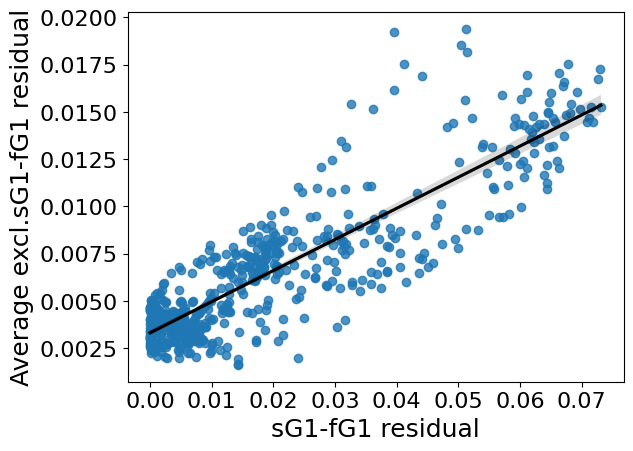

In [17]:
# Plot correlation
sc = sns.regplot(
    x=sg1_fg1_resid_squared,
    y=avg_exceptg1s_resid_squared,
    line_kws={'color': 'black'}
)
#sc.axes.set_ylim(0, 0.04)
#sc.axes.set_xlim(0, 0.08)

sc.set_xlabel('sG1-fG1 residual',fontsize=18)
sc.set_ylabel('Average excl.sG1-fG1 residual',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(fig_path + f'Unweighted-average-excluding-G1s_vs_sg1-fg1_residuals-corr.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

### Supplemental Figure 3 (two groups)

#### Structural

In [36]:
# Load data
# data_path = '/project/6050199/sudesnac/21_Codes/HumanBF-Parcellation/data'
dmri_data = np.load(data_path + 'tpl-MNI152NLin6Asym_label-fullBF_desc-concat_from-7Tgroup_connMap.npz')

In [37]:
# Correlation matrix
dmri_correlation = dmri_data['conn_group']
dmri_avg_correlation = np.nanmean(dmri_correlation, axis=0)
dmri_avg_correlation += 1

In [38]:
# Define split between 'train' and 'test'
n_splits = 1000 # should be something like 1000-5000
rs       = ShuffleSplit(n_splits=n_splits, test_size=.5, random_state=0)
X        = np.zeros((dmri_correlation.shape[0],1))

In [39]:
dmri_g_train_vals = []
dmri_g_test_vals  = []
dmri_corr_vals    = []

for i, (train_index, test_index) in enumerate(rs.split(X)):    
    # Train dataset average
    dmri_train_avg_correlation = np.nanmean(dmri_correlation[train_index,:,:], axis=0)
    
    # Train dataset average
    dmri_test_avg_correlation = np.nanmean(dmri_correlation[test_index,:,:], axis=0)
    
    # Compute principal gradient, with Procrustus alignment to average across all subjects
    dmri_gp_train = GradientMaps(
        n_components=1, 
        kernel='normalized_angle',
        approach='dm',
        alignment='procrustes',
        random_state=0
    )
    dmri_gp_train.fit([dmri_avg_correlation, dmri_train_avg_correlation])
    dmri_g_train_vals.append(dmri_gp_train.aligned_[1][:,0])
    
    # Now for test dataset
    dmri_gp_test = GradientMaps(
        n_components=1, 
        kernel='normalized_angle',
        approach='dm',
        alignment='procrustes',
        random_state=0
    )
    dmri_gp_test.fit([dmri_avg_correlation, dmri_test_avg_correlation])
    dmri_g_test_vals.append(dmri_gp_test.aligned_[1][:,0])
    
    # Pearson's correlation
    # Change to Spearman
    corr = linregress(dmri_gp_train.aligned_[1][:,0], dmri_gp_test.aligned_[1][:,0])
    dmri_corr_vals.append(corr.rvalue)

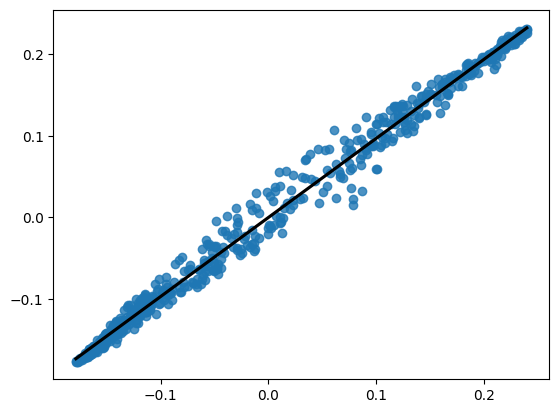

In [43]:
# Plot correlation
sc = sns.regplot(
    x=dmri_gp_train.aligned_[1],
    y=dmri_gp_test.aligned_[1],
    line_kws={'color': 'black'}
)
plt.savefig(fig_path + f'dMRI_split-half_scatter-plot.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_169900/4154959230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dmri_corr_vals)


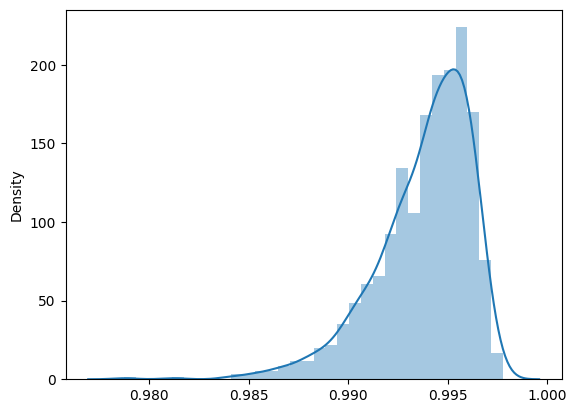

In [44]:
sns.distplot(dmri_corr_vals)
plt.savefig(fig_path + f'dMRI_split-half_dist-plot.png', dpi=300, bbox_inches='tight')
plt.show()

#### Functional

In [45]:
# Load data
#data_path = '/project/6050199/sudesnac/21_Codes/HumanBF-Parcellation/data'
fmri_data = np.load(data_path + 'correlation_matrix_HCP-MMP_group.npz')

In [46]:
# Correlation matrix
fmri_correlation     = fmri_data['corr_group']
indices              = fmri_data['indices']
fmri_avg_correlation = np.nanmean(fmri_correlation, axis=0)
fmri_avg_correlation += 1

In [47]:
fmri_g_train_vals = []
fmri_g_test_vals  = []
fmri_corr_vals    = []

# Use same splits as for the structural data
for i, (train_index, test_index) in enumerate(rs.split(X)):    
    # Train dataset average
    fmri_train_avg_correlation = np.nanmean(fmri_correlation[train_index,:,:], axis=0)
    
    # Train dataset average
    fmri_test_avg_correlation = np.nanmean(fmri_correlation[test_index,:,:], axis=0)
    
    # Compute principal gradient, with Procrustus alignment to average across all subjects
    fmri_gp_train = GradientMaps(
        n_components=1, 
        kernel='normalized_angle',
        approach='dm',
        alignment='procrustes',
        random_state=0
    )
    fmri_gp_train.fit([fmri_avg_correlation, fmri_train_avg_correlation])
    fmri_g_train_vals.append(fmri_gp_train.aligned_[1][:,0])
    
    # Now for test dataset
    fmri_gp_test = GradientMaps(
        n_components=1, 
        kernel='normalized_angle',
        approach='dm',
        alignment='procrustes',
        random_state=0
    )
    fmri_gp_test.fit([fmri_avg_correlation, fmri_test_avg_correlation])
    fmri_g_test_vals.append(fmri_gp_test.aligned_[1][:,0])
    
    # Pearson's correlation
    corr = linregress(fmri_gp_train.aligned_[1][:,0], fmri_gp_test.aligned_[1][:,0])
    fmri_corr_vals.append(corr.rvalue)

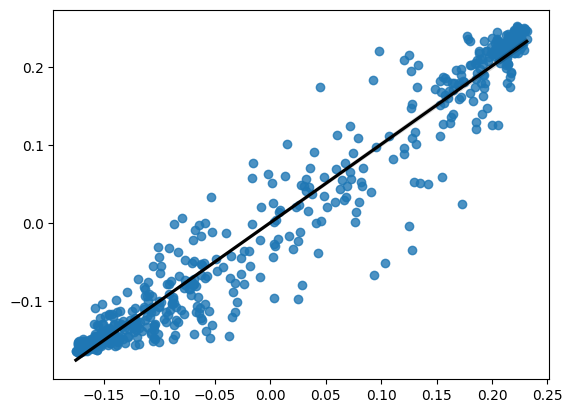

In [57]:
# Plot correlation
sc = sns.regplot(
    x=fmri_gp_train.aligned_[1],
    y=fmri_gp_test.aligned_[1],
    line_kws={'color': 'black'}
)
plt.savefig(fig_path + f'rsfMRI_split-half_scatter-plot.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_169900/2135330686.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fmri_corr_vals)


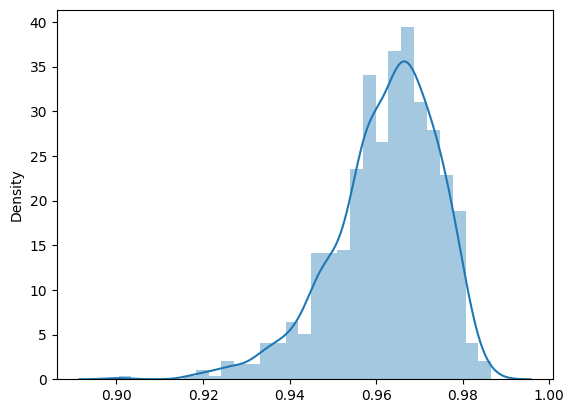

In [58]:
sns.distplot(fmri_corr_vals)
plt.savefig(fig_path + f'rsfMRI_split-half_dist-plot.png', dpi=300, bbox_inches='tight')
plt.show()

#### Residuals

In [59]:
resid_train_vals = []
resid_test_vals  = []
resid_corr_vals  = []

# Calculate residuals
for i in range(n_splits):    

    # Train
    model = sm.OLS(
        dmri_g_train_vals[i],
        fmri_g_train_vals[i]
    )
    train_results = model.fit()
    resid_train_vals.append(train_results.resid)

    # Test
    model = sm.OLS(
        dmri_g_test_vals[i],
        fmri_g_test_vals[i]
    )
    test_results = model.fit()    
    resid_test_vals.append(test_results.resid)

    # Pearson's correlation
    corr = linregress(train_results.resid, test_results.resid)
    resid_corr_vals.append(corr.rvalue)

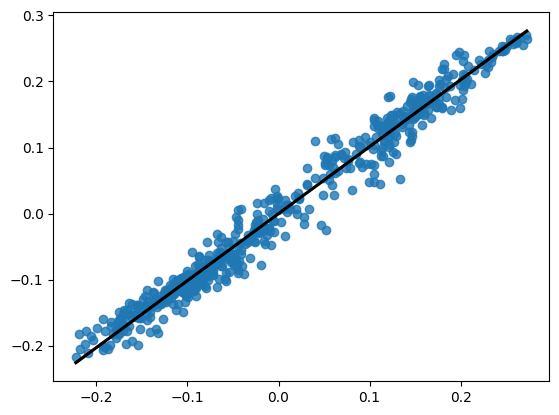

In [60]:
# Plot correlation
sc = sns.regplot(
    x=resid_train_vals[0],
    y=resid_test_vals[0],
    line_kws={'color': 'black'}
)
plt.savefig(fig_path + f'Residuals_split-half_scatter-plot.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_169900/2418936995.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid_corr_vals)


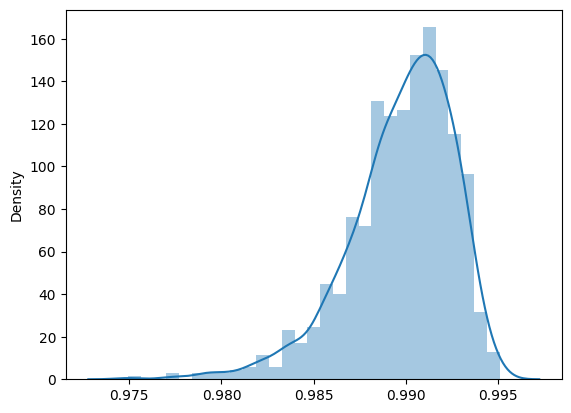

In [61]:
sns.distplot(resid_corr_vals)
plt.savefig(fig_path + f'Residuals_split-half_dist-plot.png', dpi=300, bbox_inches='tight')
plt.show()

### Supplemental Figure 3 (leave one out)

#### Structural

In [62]:
# Define splits
loo      = LeaveOneOut()
X        = np.zeros((dmri_correlation.shape[0],1))
n_splits = loo.get_n_splits(X)

In [63]:
dmri_g_train_loo_vals = []
dmri_g_test_loo_vals  = []
dmri_corr_loo_vals    = []

for i, (train_index, test_index) in enumerate(loo.split(X)):    
    # Train dataset average
    dmri_train_avg_correlation = np.nanmean(dmri_correlation[train_index,:,:], axis=0)
    
    # Train dataset average
    dmri_test_avg_correlation = np.nanmean(dmri_correlation[test_index,:,:], axis=0)
    
    # Compute principal gradient, with Procrustus alignment to average across all subjects
    dmri_gp_train = GradientMaps(
        n_components=1, 
        kernel='normalized_angle',
        approach='dm',
        alignment='procrustes',
        random_state=0
    )
    dmri_gp_train.fit([dmri_avg_correlation, dmri_train_avg_correlation])
    dmri_g_train_loo_vals.append(dmri_gp_train.aligned_[1][:,0])
    
    # Now for test dataset
    dmri_gp_test = GradientMaps(
        n_components=1, 
        kernel='normalized_angle',
        approach='dm',
        alignment='procrustes',
        random_state=0
    )
    dmri_gp_test.fit([dmri_avg_correlation, dmri_test_avg_correlation])
    dmri_g_test_loo_vals.append(dmri_gp_test.aligned_[1][:,0])
    
    # Pearson's correlation
    # Change to Spearman
    corr = linregress(dmri_gp_train.aligned_[1][:,0], dmri_gp_test.aligned_[1][:,0])
    dmri_corr_loo_vals.append(corr.rvalue)

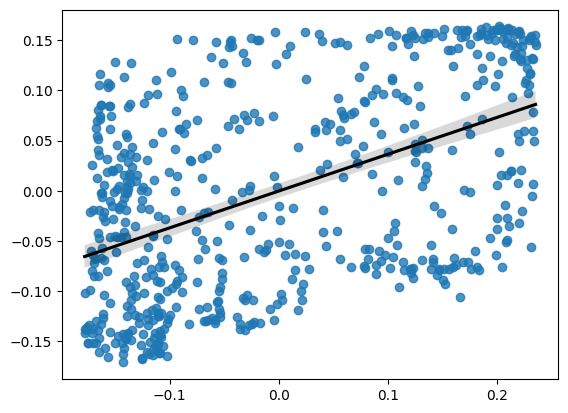

In [64]:
# Plot correlation
sc = sns.regplot(
    x=dmri_gp_train.aligned_[1],
    y=dmri_gp_test.aligned_[1],
    line_kws={'color': 'black'}
)
plt.savefig(fig_path + f'dMRI_leave-one-out_scatter-plot.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_169900/784176119.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dmri_corr_loo_vals)


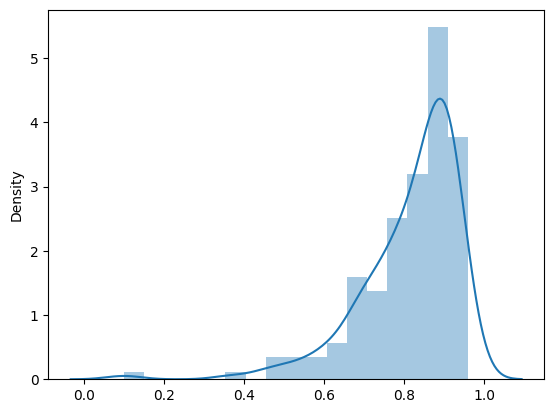

In [65]:
sns.distplot(dmri_corr_loo_vals)
plt.savefig(fig_path + f'dMRI_leave-one-out_dist-plot.png', dpi=300, bbox_inches='tight')
plt.show()

#### Functional

In [66]:
fmri_g_train_loo_vals = []
fmri_g_test_loo_vals  = []
fmri_corr_loo_vals    = []

# Use same splits as for the structural data
for i, (train_index, test_index) in enumerate(loo.split(X)):    
    # Train dataset average
    fmri_train_avg_correlation = np.nanmean(fmri_correlation[train_index,:,:], axis=0)
    
    # Train dataset average
    fmri_test_avg_correlation = np.nanmean(fmri_correlation[test_index,:,:], axis=0)
    
    # Compute principal gradient, with Procrustus alignment to average across all subjects
    fmri_gp_train = GradientMaps(
        n_components=1, 
        kernel='normalized_angle',
        approach='dm',
        alignment='procrustes',
        random_state=0
    )
    fmri_gp_train.fit([fmri_avg_correlation, fmri_train_avg_correlation])
    fmri_g_train_loo_vals.append(fmri_gp_train.aligned_[1][:,0])
    
    # Now for test dataset
    fmri_gp_test = GradientMaps(
        n_components=1, 
        kernel='normalized_angle',
        approach='dm',
        alignment='procrustes',
        random_state=0
    )
    fmri_gp_test.fit([fmri_avg_correlation, fmri_test_avg_correlation])
    fmri_g_test_loo_vals.append(fmri_gp_test.aligned_[1][:,0])
    
    # Pearson's correlation
    corr = linregress(fmri_gp_train.aligned_[1][:,0], fmri_gp_test.aligned_[1][:,0])
    fmri_corr_loo_vals.append(corr.rvalue)

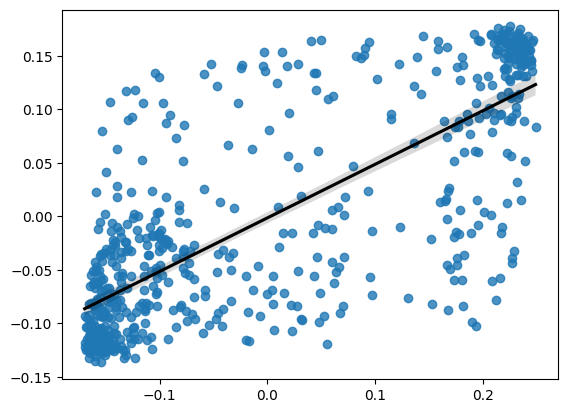

In [67]:
# Plot correlation
sc = sns.regplot(
    x=fmri_gp_train.aligned_[1],
    y=fmri_gp_test.aligned_[1],
    line_kws={'color': 'black'}
)
plt.savefig(fig_path + f'rsfMRI_leave-one-out_scatter-plot.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_169900/1111551996.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fmri_corr_loo_vals)


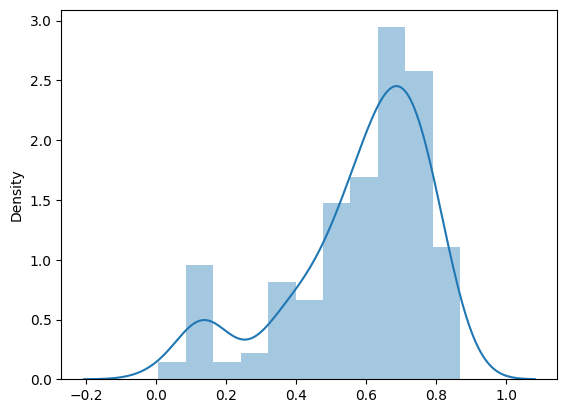

In [68]:
sns.distplot(fmri_corr_loo_vals)
plt.savefig(fig_path + f'rsfMRI_leave-one-out_dist-plot.png', dpi=300, bbox_inches='tight')
plt.show()

#### Residuals

In [69]:
resid_train_loo_vals = []
resid_test_loo_vals  = []
resid_corr_loo_vals  = []

# Calculate residuals
for i in range(n_splits):    

    # Train
    model = sm.OLS(
        dmri_g_train_loo_vals[i],
        fmri_g_train_loo_vals[i]
    )
    train_results = model.fit()
    resid_train_loo_vals.append(train_results.resid)

    # Test
    model = sm.OLS(
        dmri_g_test_loo_vals[i],
        fmri_g_test_loo_vals[i]
    )
    test_results = model.fit()    
    resid_test_loo_vals.append(test_results.resid)

    # Pearson's correlation
    corr = linregress(train_results.resid, test_results.resid)
    resid_corr_loo_vals.append(corr.rvalue)

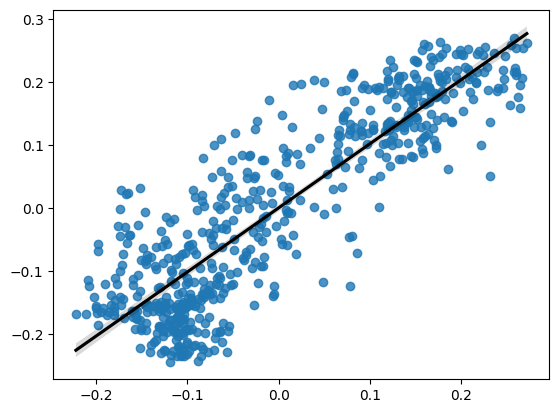

In [70]:
# Plot correlation
sc = sns.regplot(
    x=resid_train_loo_vals[0],
    y=resid_test_loo_vals[0],
    line_kws={'color': 'black'}
)
plt.savefig(fig_path + f'Residuals_leave-one-out_scatter-plot.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_169900/390867420.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid_corr_loo_vals)


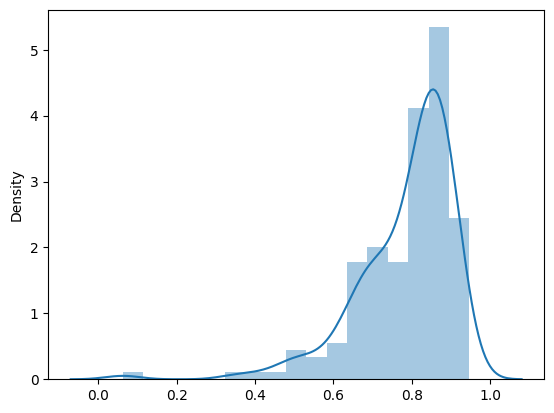

In [71]:
sns.distplot(resid_corr_loo_vals)
plt.savefig(fig_path + f'Residuals_leave-one-out_dist-plot.png', dpi=300, bbox_inches='tight')
plt.show()

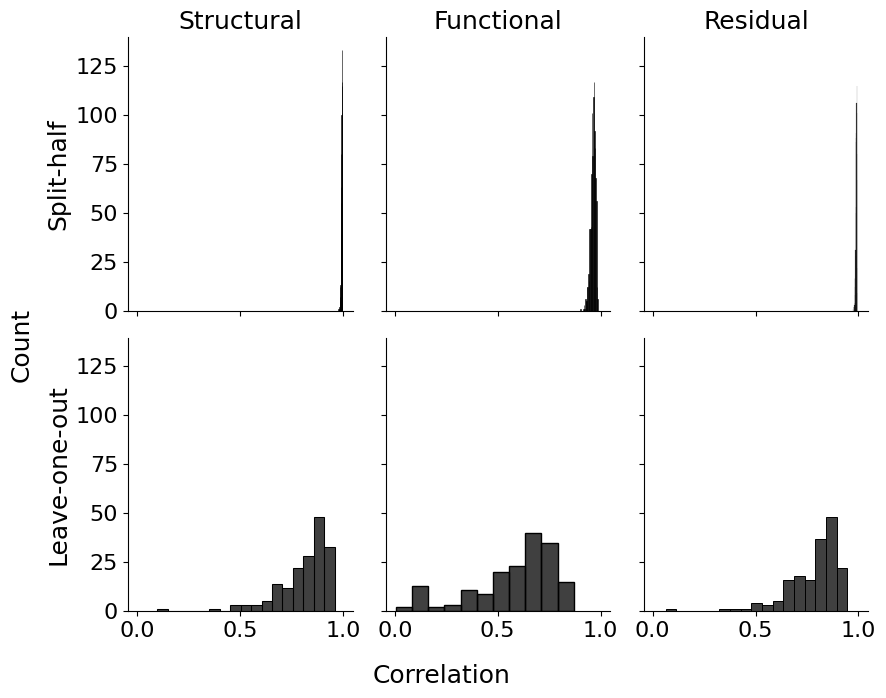

In [72]:
import matplotlib

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 


fig, ax = plt.subplots(2,3, sharex=True, sharey=True, figsize=(9,7))

# Split
g1=sns.histplot(dmri_corr_vals, stat='count', color='black', ax=ax[0,0])
sns.histplot(fmri_corr_vals, stat='count', color='black', ax=ax[0,1])
sns.histplot(resid_corr_vals, stat='count', color='black', ax=ax[0,2])
g1.set_ylabel('Split-half', fontsize=18)

# Leave one out
g2=sns.histplot(dmri_corr_loo_vals, stat='count', color='black', ax=ax[1,0])
sns.histplot(fmri_corr_loo_vals, stat='count', color='black', ax=ax[1,1])
sns.histplot(resid_corr_loo_vals, stat='count', color='black', ax=ax[1,2])
g2.set_ylabel('Leave-one-out', fontsize=18)

sns.despine()

ax[0, 0].set_title("Structural",fontsize=18)
ax[0, 1].set_title("Functional",fontsize=18)
ax[0, 2].set_title("Residual",fontsize=18)

fig.supxlabel("Correlation", fontsize=18)
fig.supylabel("Count", fontsize=18)

plt.tight_layout()
plt.savefig(fig_path + f'rsfMRI-dMRI-resid_split_leave-one-out_dist-plot.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [79]:
SH_corr_vals = {"split-half dmri":dmri_corr_vals, "split-half func":fmri_corr_vals, "split-half resid":resid_corr_vals}
LOO_corr_vals={"leave-one-out dmri":dmri_corr_loo_vals, "leave-one-out func":fmri_corr_loo_vals, "leave-one-out resid":resid_corr_loo_vals}

In [80]:
df_SH = pd.DataFrame(SH_corr_vals)
df_LOO = pd.DataFrame(LOO_corr_vals)

In [81]:
df_SH

,split-half dmri,split-half func,split-half resid
0,0.992835,0.966872,0.988260
1,0.993016,0.975176,0.989932
2,0.995227,0.977398,0.993253
3,0.995418,0.969131,0.992637
4,0.996158,0.945836,0.991787
...,...,...,...
995,0.990042,0.925262,0.983781
996,0.996362,0.963326,0.991274
997,0.992145,0.964824,0.988837
998,0.996150,0.942767,0.990284


In [82]:
df_LOO

,leave-one-out dmri,leave-one-out func,leave-one-out resid
0,0.920249,0.114585,0.877346
1,0.936123,0.152732,0.893203
2,0.894927,0.362670,0.863628
3,0.723957,0.341139,0.657084
4,0.875580,0.486417,0.870805
...,...,...,...
168,0.868012,0.671969,0.844090
169,0.922769,0.725722,0.908489
170,0.456678,0.730089,0.453957
171,0.700615,0.585113,0.675997


In [83]:
pd.DataFrame(df_SH).to_csv(results_path + 'Split-half_corr_data.csv', index=False)
pd.DataFrame(df_LOO).to_csv(results_path + 'Leave-one-out_corr_data.csv', index=False)